# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**AI-generated notebook**  
:warning: *This notebook was automatically generated by an AI and has not been fully verified by a researcher. Please use caution when interpreting the code or results, and cross-check with the data documentation as needed.*

---

## Overview

This notebook provides an interactive exploration of the Dandiset [Septum GABA disruption with DREADDs](https://dandiarchive.org/dandiset/001375/0.250406.1855) (version 0.250406.1855). This study investigates the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity in mice. The data includes electrophysiological recordings and spike sorting results stored in NWB files.

**Link to Dandiset:**  
[https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

---

## What this notebook covers

- Summary and metadata of the Dandiset.
- Overview of available assets (files).
- How to programmatically access and examine the NWB files in this dataset using the DANDI API, PyNWB, h5py, and remfile.
- Guided walkthrough of key data in an example NWB file, including subject details, experimental trials, electrodes, and spike unit tables.
- Example visualizations and outputs to illustrate working with the data.
- Next steps and possible directions for further analysis.

The aim is to help you hit the ground running by understanding the Dandiset structure and learning how to access, summarize, and visualize its data.

## Required packages

The following Python packages are required to run this notebook:

- numpy
- pandas
- matplotlib
- pynwb
- h5py
- remfile
- dandi
- seaborn

_All are assumed to be installed on your system._

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice

# For Dandiset and NWB access
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile

sns.set_theme()  # Styling for non-image plots

## Load Dandiset metadata using the DANDI API

In [2]:
# Connect to DANDI archive and fetch the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")
metadata = dandiset.get_raw_metadata()

print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata.get('url', 'https://dandiarchive.org/dandiset/001375/0.250406.1855')}")
print(f"Description: {metadata.get('description', '')}")
print(f"Contributors: {metadata.get('contributor', [])}")
print(f"Date Created: {metadata.get('dateCreated', '')}")
print(f"License: {metadata.get('license', [])}")
print(f"Measurement Techniques: {[t['name'] for t in metadata.get('measurementTechnique', [])]}")
print(f"Variables measured: {metadata.get('variableMeasured', [])}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: [{'name': 'Eckert, Michael', 'email': 'meckert1@uci.edu', 'roleName': ['dcite:ContactPerson'], 'schemaKey': 'Person', 'affiliation': [], 'includeInCitation': True}, {'name': 'NIH Brain', 'roleName': ['dcite:Funder'], 'schemaKey': 'Organization', 'identifier': 'https://ror.org/05h1kgg64', 'awardNumber': 'NS121764', 'includeInCitation': False}, {'name': 'McNaughton, Bruce', 'email': 'brucemcn@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}, {'name': 'Ferbinteanu, Janina', 'email': 'janina.ferbinteanu@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}]
Date Created: 2025-04-05T16:33:36.070433+00:00
License: ['spdx:CC-BY-4.0']
Measurement Technique

## List available assets in the Dandiset

In [3]:
# List first 5 assets in the Dandiset for inspection
assets = list(dandiset.get_assets())
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")


First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb (ID: ce525828-8534-4b56-9e47-d2a34d1aa897, Size: 54970745645 bytes)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb (ID: 376dc673-611b-4521-b135-9ec01c7f4f74, Size: 69445661969 bytes)
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb (ID: fea95c0e-2f07-49a3-b607-4b7e9f278e16, Size: 69788881498 bytes)


### Files available for analysis

For illustration, this notebook will use the following NWB file:

**Path:** `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`  
**Asset ID:** `ce525828-8534-4b56-9e47-d2a34d1aa897`  

**Direct download URL:**  
https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/

**[Explore this NWB file in Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)**

*(To analyze other files, update the asset_id/path in the relevant code cells below.)*

## Load and summarize the NWB file

We will illustrate data access from the selected file above. This code shows how to stream the file directly from the DANDI Archive using `remfile` with `h5py` and `pynwb`.

**Note:** Only certain metadata and small data subsets are loaded for demonstration, due to file size. Loading all raw data or timestamps may be impractical.

The approach follows best practices for streaming remote NWB files.

In [4]:
# Load the NWB file from DANDI (remotely)
nwb_url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Summarize the NWB file's session metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {getattr(nwb.subject, 'subject_id', None)}")
print(f"Subject species: {getattr(nwb.subject, 'species', None)}")
print(f"Subject sex: {getattr(nwb.subject, 'sex', None)}")
print(f"Number of trials: {len(getattr(nwb.trials, 'id', [])) if nwb.trials else 'N/A'}")
print(f"Number of electrodes: {len(getattr(nwb.electrodes, 'id', [])) if nwb.electrodes else 'N/A'}")
print(f"Number of units: {len(getattr(nwb.units, 'id', [])) if nwb.units else 'N/A'}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: mouse running laps in virtual hallway
Identifier: MS13B
Session start time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject species: Mus musculus
Subject sex: M
Number of trials: 387
Number of electrodes: 256
Number of units: 33


### High-level NWB file structure

```
NWBFile
├── session_description: mouse running laps in virtual hallway
├── identifier: MS13B
├── subject
│   ├── subject_id: MS13B
│   ├── species: Mus musculus
│   ├── sex: M
│   ├── age: P90D
│   ├── description: medial septum DREADD to suppress GABA interneurons
├── devices
│   └── silicon probe array (128 ch silicon probe, UCLA)
├── electrode_groups
│   ├── shank1: ventral hippocampus, visual cortex
│   └── shank2: ventral hippocampus, visual cortex
├── electrodes: table (256 rows × 7 columns)
├── intervals
│   └── trials: table (387 rows × 2 columns)
├── acquisition
│   └── time_series: (144,675,584 × 256 int16 data)
└── units: (33 single units)
```

The NWB file contains rich metadata and large-scale extracellular electrophysiology. Below, we explore several key tables and dimensions.

## Subject and session metadata

In [5]:
# Extract subject information
subject = nwb.subject
print(f"Subject ID: {getattr(subject, 'subject_id', None)}")
print(f"Species: {getattr(subject, 'species', None)}")
print(f"Sex: {getattr(subject, 'sex', None)}")
print(f"Age: {getattr(subject, 'age', None)}")
print(f"Description: {getattr(subject, 'description', None)}")

print("\nSession info:")
print(f"Description: {nwb.session_description}")
print(f"Start time: {nwb.session_start_time}")
print(f"Timestamps reference time: {nwb.timestamps_reference_time}")
print(f"File creation date: {nwb.file_create_date}")

Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D
Description: medial septum DREADD to suppress GABA interneurons

Session info:
Description: mouse running laps in virtual hallway
Start time: 2024-07-25 19:00:00-07:00
Timestamps reference time: 2024-07-25 19:00:00-07:00
File creation date: [datetime.datetime(2025, 4, 5, 16, 50, 15, 663983, tzinfo=tzoffset(None, -25200))]


## Trial intervals table

The trials table defines start and stop times (in seconds) for each trial/lap.  
Let's show the first few trials.

First 5 trials:


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


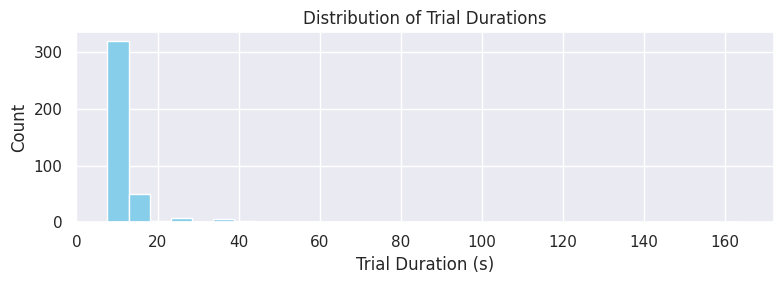

In [6]:
trials_df = nwb.trials.to_dataframe()
print("First 5 trials:")
display(trials_df.head())

# Visualize trial durations
trial_durations = trials_df['stop_time'] - trials_df['start_time']
plt.figure(figsize=(8, 3))
plt.hist(trial_durations, bins=30, color='skyblue')
plt.xlabel('Trial Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Trial Durations')
plt.tight_layout()
plt.show()

## Electrode table

The electrodes table describes each contact's position and group.  
Let's see the first few electrodes.

First 5 electrodes:


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13590...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13590...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13590...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13590...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x13590...,shank1,shank1-electrode005


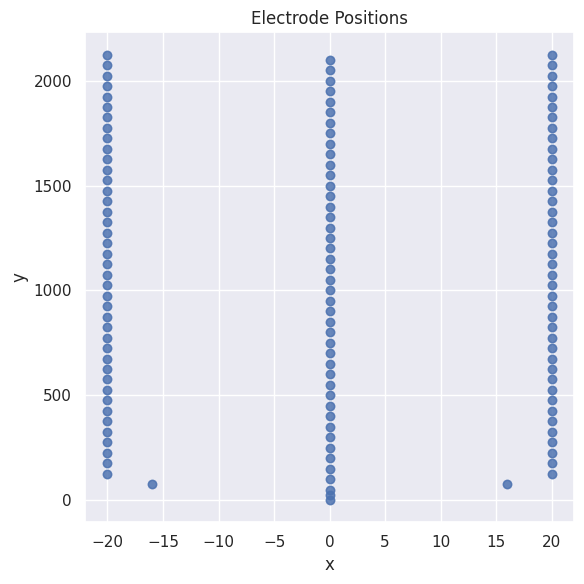

In [7]:
elec_df = nwb.electrodes.to_dataframe()
print("First 5 electrodes:")
display(elec_df.head())

# Visualize electrode positions if available
if 'x' in elec_df.columns and 'y' in elec_df.columns:
    plt.figure(figsize=(6, 6))
    plt.scatter(elec_df['x'], elec_df['y'], alpha=0.6)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Electrode Positions')
    plt.tight_layout()
    plt.show()

## Device and electrode groups summary

In [8]:
# Device
if hasattr(nwb, 'devices'):
    for dev_name, device in nwb.devices.items():
        print(f"Device: {dev_name}\n  Description: {getattr(device, 'description', '')}\n  Manufacturer: {getattr(device, 'manufacturer', '')}")

# Electrode groups
if hasattr(nwb, 'electrode_groups'):
    for eg_name, eg in nwb.electrode_groups.items():
        print(f"Electrode Group: {eg_name}\n  Description: {getattr(eg, 'description', '')}\n  Location: {getattr(eg, 'location', '')}\n  Device: {getattr(eg.device, 'description', '')}")

Device: silicon probe array
  Description: 128 ch silicon probe
  Manufacturer: UCLA
Electrode Group: shank1
  Description: shank1, electrodes
  Location: ventral hippocampus, visual cortex
  Device: 128 ch silicon probe
Electrode Group: shank2
  Description: shank2, electrodes
  Location: ventral hippocampus, visual cortex
  Device: 128 ch silicon probe


## Units (Single-Unit Table)

Spike-sorted units and their spike times are in the units table.  
Let's show a summary and plot spike counts of the first few units.

First 5 units:


,spike_times
id,
1,"[3.5485, 3.5543666666666667, 3.784666666666667..."
2,"[0.1826, 0.21976666666666667, 0.77823333333333..."
3,"[0.005533333333333334, 0.01633333333333333, 0...."
4,"[0.5452333333333333, 0.5632, 0.572833333333333..."
5,"[0.07036666666666666, 0.1002, 0.17066666666666..."


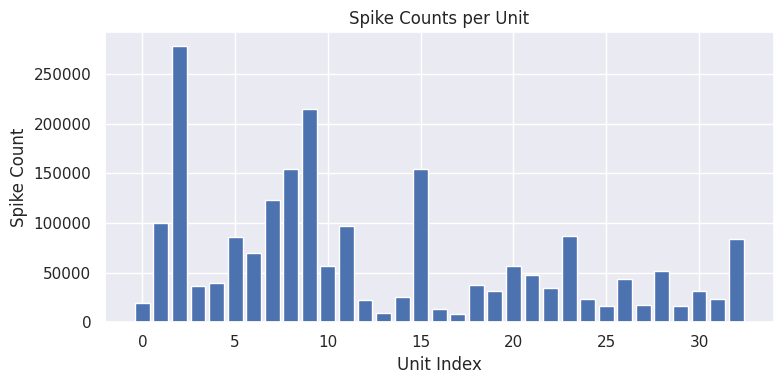

In [9]:
units_df = nwb.units.to_dataframe()
print("First 5 units:")
display(units_df.head())

# Compute spike counts per unit (number of spike times)
spike_counts = [len(nwb.units['spike_times'][i]) for i in range(len(nwb.units['id']))]

# Plot spike counts
plt.figure(figsize=(8, 4))
plt.bar(np.arange(len(spike_counts)), spike_counts)
plt.xlabel('Unit Index')
plt.ylabel('Spike Count')
plt.title('Spike Counts per Unit')
plt.tight_layout()
plt.show()

## Raw data: Previewing a segment of extracellular data

The acquisition field contains a very large data matrix of extracellular recordings.  
For illustration **we will only load and visualize a small subset** (first 1 sec, first 8 channels).

**Caution**: Loading large segments remotely may be slow.

Time series shape: (144675584, 256), dtype: int16
Starting time: 0.0 s; Sampling rate: 30000.0 Hz


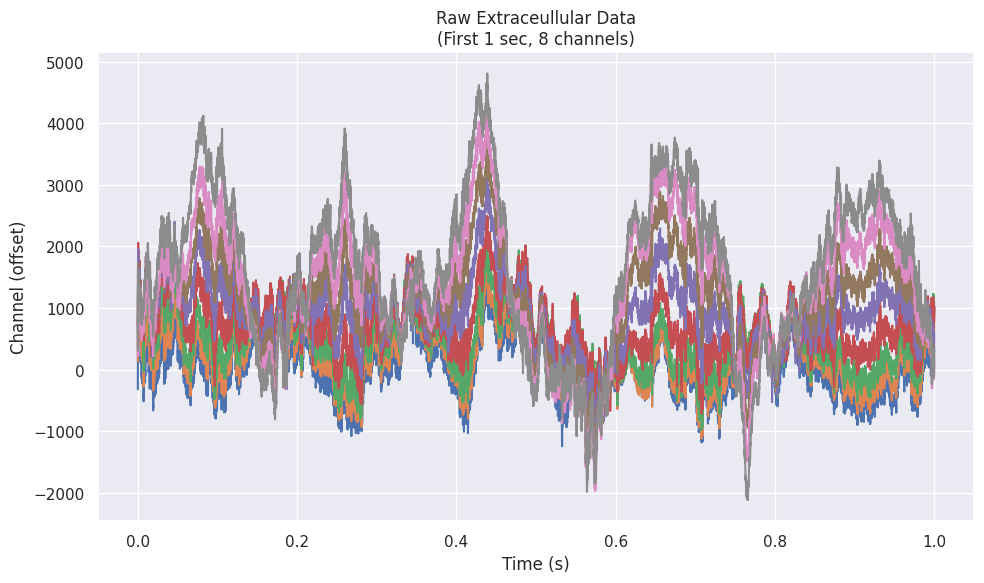

In [10]:
# Access time series dataset
ts = nwb.acquisition['time_series']

# Metadata
print(f"Time series shape: {ts.data.shape}, dtype: {ts.data.dtype}")
print(f"Starting time: {ts.starting_time} s; Sampling rate: {ts.rate} Hz")

# Load small segment for illustration
sample_rate = ts.rate
n_chans = min(ts.data.shape[1], 8)
n_samples = int(1.0 * sample_rate)  # 1 second
data_segment = ts.data[:n_samples, :n_chans]  # shape (n_samples, n_chans)

time_axis = np.arange(n_samples) / sample_rate

plt.figure(figsize=(10, 6))
offset = np.arange(n_chans) * 200  # offset for visibility
for ch in range(n_chans):
    plt.plot(time_axis, data_segment[:, ch] + offset[ch], label=f'Ch {ch}')
plt.xlabel('Time (s)')
plt.ylabel('Channel (offset)')
plt.title('Raw Extraceullular Data\n(First 1 sec, 8 channels)')
plt.tight_layout()
plt.show()

## Advanced: Raster plot of spikes for selected units and trials

As an illustration, let’s show a raster plot of spike times for the first 5 units during the first 10 trials.

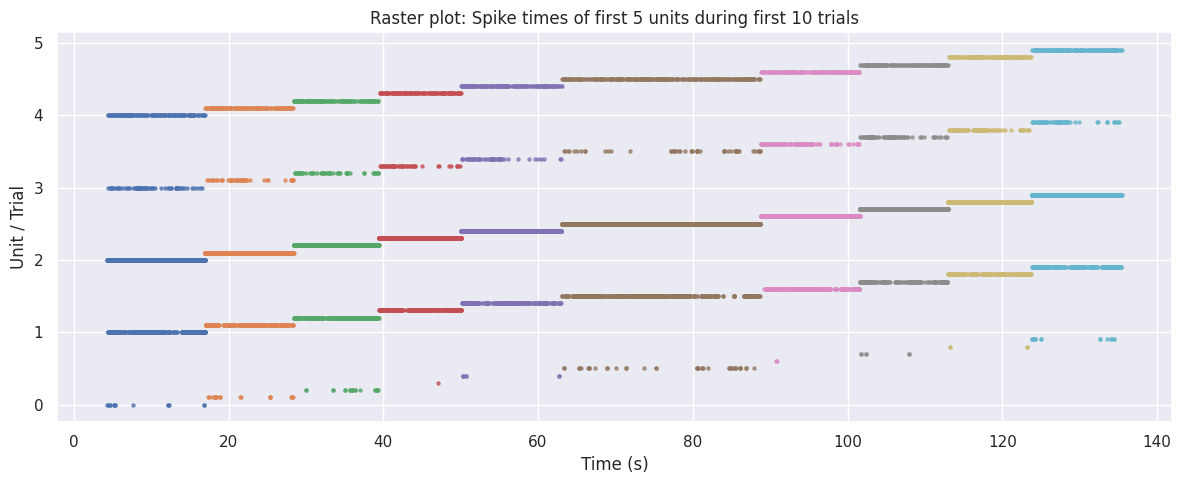

In [11]:
selected_units = np.arange(min(5, len(nwb.units['id'])))
selected_trials = trials_df.iloc[:10]

plt.figure(figsize=(12, 5))
for i_unit, unit_idx in enumerate(selected_units):
    spikes = nwb.units['spike_times'][unit_idx]
    for _, trial in selected_trials.iterrows():
        # Plot only spikes occurring in this trial interval
        spikes_in_trial = spikes[(spikes >= trial['start_time']) & (spikes < trial['stop_time'])]
        trial_number = selected_trials.index.get_loc(trial.name)
        plt.scatter(spikes_in_trial, np.ones_like(spikes_in_trial)*i_unit + trial_number*0.1,
                    s=5, label=f'Unit {i_unit}' if trial_number==0 else "", alpha=0.7)

plt.xlabel('Time (s)')
plt.ylabel('Unit / Trial')
plt.title('Raster plot: Spike times of first 5 units during first 10 trials')
plt.tight_layout()
plt.show()

## Summary and next steps

- This notebook illustrated how to access the Dandiset [001375](https://dandiarchive.org/dandiset/001375/0.250406.1855), explore its rich electrophysiology data, and visualize basic features such as trials, electrodes, units, and raw traces.
- All code for accessing remote NWB data is demonstrated with concrete examples; you may adapt it for other assets or larger scopes as needed.
- For further analysis, you may want to:
  - Perform more detailed spike sorting quality assessment.
  - Analyze firing rates aligned to behavior or trial structure.
  - Assess waveforms, electrode spatial activity patterns, or trial-specific responses.
  - Explore additional assets in the Dandiset for comparative studies.

Be mindful that because of large file sizes, working with small, targeted data subsets is typically best for interactive analysis.

For more info or advanced topics, consult the [DANDI documentation](https://www.dandiarchive.org/handbook/) and PyNWB docs.

---
_Notebook created automatically via AI for initial exploration. Please double-check results and code before using for research conclusions!_